In [2]:
import csv
import json
import pandas as pd
import numpy as np
import time
import string
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random

import meetup.api

In [3]:
client = meetup.api.Client('763b1314426e21594926336f036a54')

## Groups

34. Tech
32. Sport
16. Language
12. LGBT
2. Business
1. Art

In [4]:
category = []

In [5]:
tech_groups = client.GetGroups(category_id=34, country='USA')
sport_groups = client.GetGroups(category_id=32, country='USA')
language_groups = client.GetGroups(category_id=16, country='USA')
lgbt_groups = client.GetGroups(category_id=12, country='USA')
business_groups = client.GetGroups(category_id=2, country='USA')
art_groups = client.GetGroups(category_id=1, country='USA')

29/30 (10 seconds remaining)
29/30 (10 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (5 seconds remaining)
29/30 (10 seconds remaining)


In [6]:
def parseGroup(groups):
    member_total = 0
    word_total = 0
    rating_total = 0
    count = 0
    max_member = 0
    for result in groups.results:
        if 'description' in result:
            count = count + 1
            if result['members'] > max_member:
                max_member = result['members']
            member_total = member_total + result['members']
            word_total = word_total + len(result['description'].split())
            rating_total = rating_total + result['rating']
        
    return member_total/count, max_member, word_total/count, rating_total/count

In [7]:
# tech_group
m,max_member,w,r = parseGroup(tech_groups)
print (m, max_member, w, r)

2264.086956521739 60207 100.13586956521739 4.477500000000001


In [8]:
# sport_group
m,max_member,w,r = parseGroup(sport_groups)
print (m, max_member, w, r)

1590.4120603015076 9725 182.07035175879398 4.607286432160803


In [9]:
# language_group
m,max_member,w,r = parseGroup(language_groups)
print (m, max_member, w, r)

2138.0725388601036 24582 156.74093264248705 4.57663212435233


In [10]:
# lgbt_group
m,max_member,w,r = parseGroup(lgbt_groups)
print (m, max_member, w, r)

1402.0502512562814 7625 195.0854271356784 4.633316582914573


In [11]:
# business_group
m,max_member,w,r = parseGroup(business_groups)
print (m, max_member, w, r)

1663.5257731958764 20152 203.6237113402062 4.48701030927835


In [12]:
# art_group
m,max_member, w,r = parseGroup(art_groups)
print (m, max_member, w, r)

2518.96 27672 200.02 4.6293


## Members of these groups

In [13]:
def getMembers(groups):
    members = []
    for i in range(10):
        result = groups.results[i]
        temp = client.GetMembers(group_id=result['id'])
        for m in temp.results:
            members.append(m)
    
    return members

In [14]:
art_members = getMembers(art_groups)
business_members = getMembers(business_groups)
lgbt_members = getMembers(lgbt_groups)
language_members = getMembers(language_groups)
sport_members = getMembers(sport_groups)
tech_members = getMembers(tech_groups)

29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (4 seconds remaining)
26/30 (2 seconds remaining)
25/30 (0 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (7 seconds remaining)
26/30 (7 seconds remaining)
25/30 (4 seconds remaining)
24/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (3 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (5 seconds remaining)
26/30 (2 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (4 seconds remaining)
26/30 (3 seconds remaining)
25/30 (3 seconds remaining)
24/30 (3 seconds remaining)
23/30 (2 seconds remaining)
22/30 (1 seconds remaining)
21/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (8 seconds remaining)
25/30 (4 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (6 seconds remaining)
26/30 (4 se

In [15]:
def getBio(members):
    bio = []
    for m in members:
        if 'bio' in m:
            bio.append(m['bio'])
    return bio

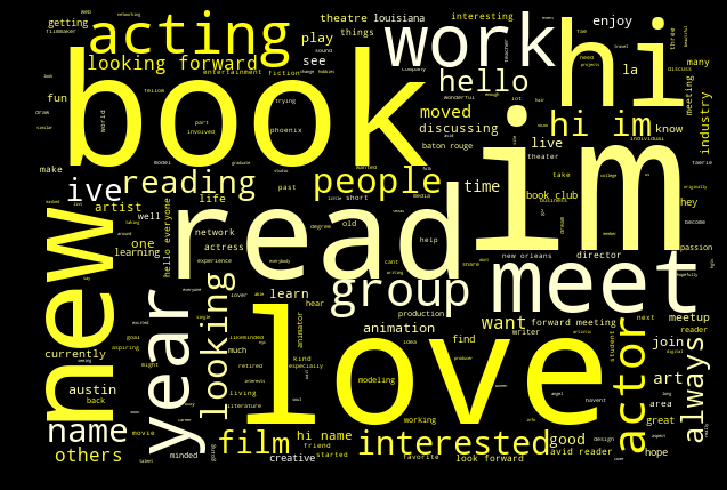

In [17]:
art_bio = getBio(art_members)
art_bio = pd.Series(art_bio)

description_words = ''
for val in art_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(60,100%%, %d%%)" % random.randint(50, 100)

wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

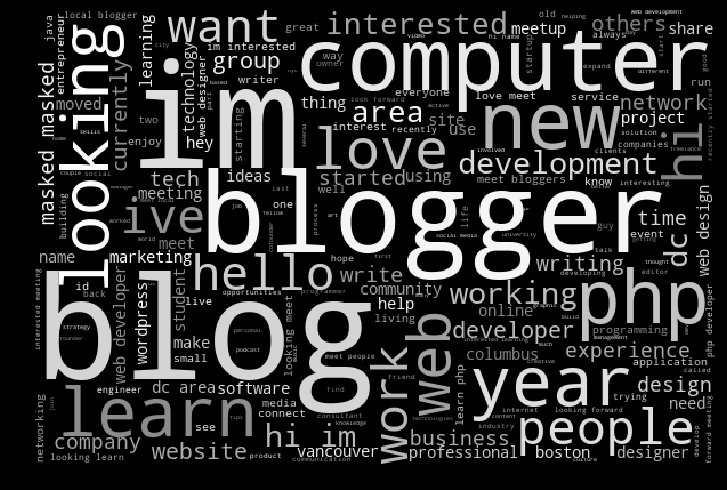

In [223]:
tech_bio = getBio(tech_members)
tech_bio = pd.Series(tech_bio)

description_words = ''
for val in tech_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(50, 100)

description_words = description_words.replace("blogging", "computer")
wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

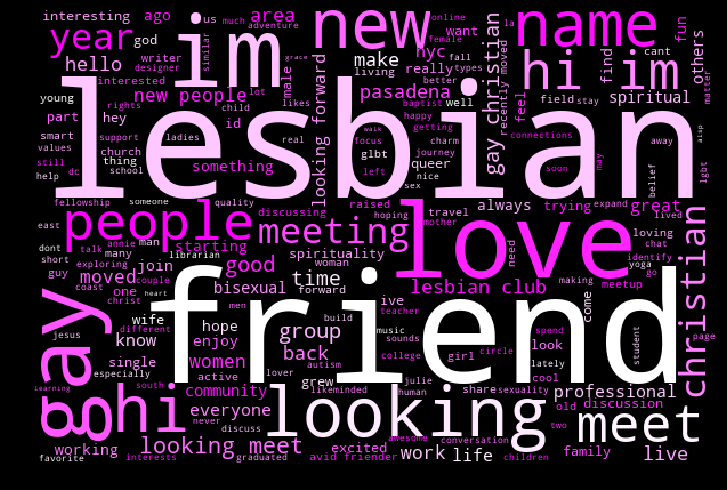

In [227]:
lgbt_bio = getBio(lgbt_members)
lgbt_bio = pd.Series(lgbt_bio)

description_words = ''
for val in lgbt_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(300, 100%%, %d%%)" % random.randint(50, 100)

description_words = description_words.replace("book", "lesbian")
description_words = description_words.replace("reading", "gay")
description_words = description_words.replace("read", "friend")

wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

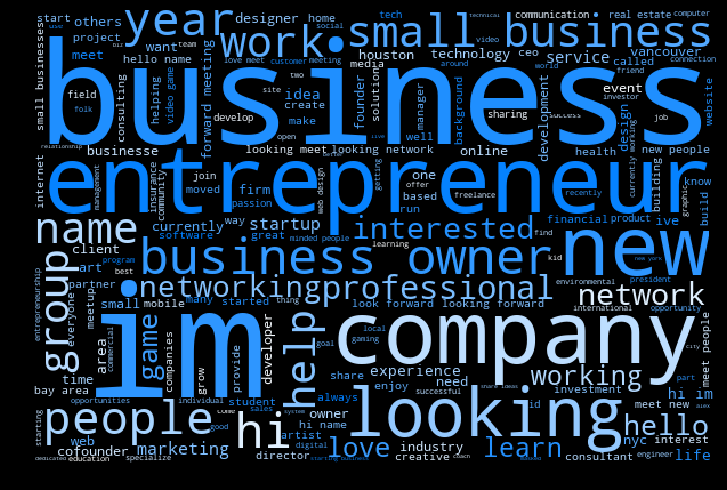

In [208]:
business_bio = getBio(business_members)
business_bio = pd.Series(business_bio)

description_words = ''
for val in business_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 100)

wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

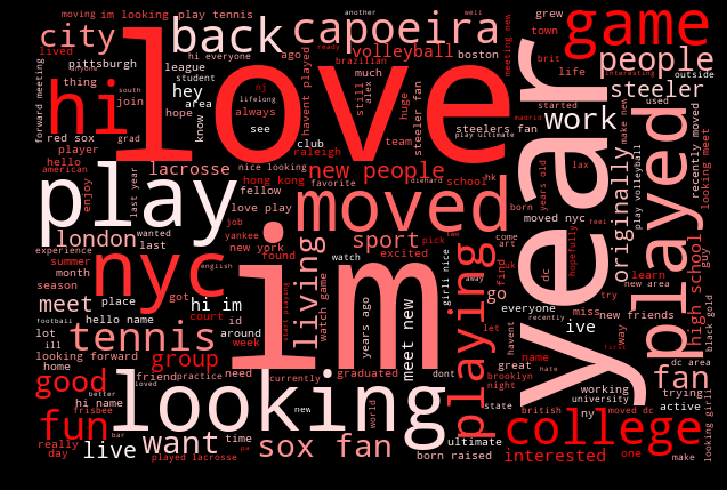

In [211]:
sport_bio = getBio(sport_members)
sport_bio = pd.Series(sport_bio)

description_words = ''
for val in sport_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(50, 100)

wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

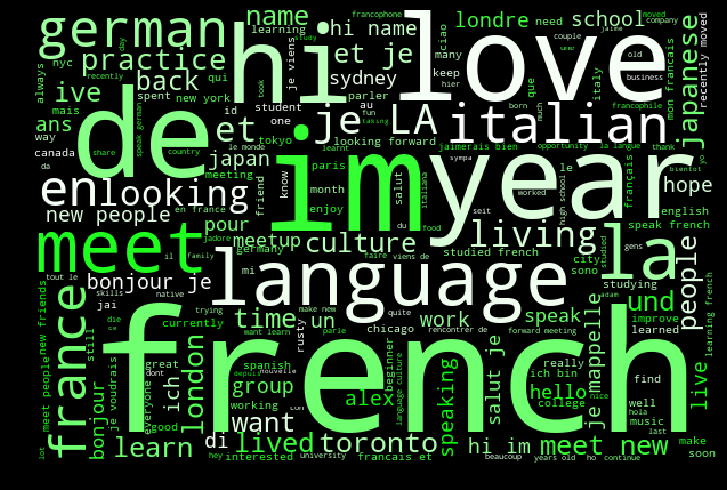

In [225]:
language_bio = getBio(language_members)
language_bio = pd.Series(language_bio)

description_words = ''
for val in language_bio:
    val = ''.join([i for i in val if not i.isdigit()])
    val = val.lower()
    val = val.translate(str.maketrans('','',string.punctuation))
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        description_words = description_words + words + ' '
        
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(120, 100%%, %d%%)" % random.randint(50, 100)

description_words = description_words.replace("suis", "LA")
wordcloud = WordCloud(width=600, height=400).generate(description_words)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [176]:
from collections import Counter
wordcount = Counter(description_words.split())
print(wordcount)

Counter({'im': 103, 'hi': 58, 'love': 51, 'like': 41, 'looking': 38, 'new': 36, 'books': 35, 'name': 31, 'read': 30, 'would': 26, 'acting': 25, 'meet': 25, 'book': 25, 'hello': 24, 'forward': 23, 'work': 22, 'people': 21, 'group': 21, 'interested': 20, 'ive': 19, 'years': 19, 'reading': 19, 'also': 18, 'always': 16, 'others': 15, 'want': 15, 'moved': 14, 'meeting': 13, 'actors': 13, 'film': 13, 'good': 12, 'art': 12, 'la': 11, 'live': 11, 'join': 11, 'austin': 11, 'time': 11, 'reader': 11, 'animation': 11, 'industry': 10, 'actor': 10, 'enjoy': 10, 'learn': 10, 'everyone': 10, 'avid': 10, 'see': 10, 'discussing': 10, 'one': 10, 'club': 10, 'know': 9, 'currently': 9, 'get': 9, 'life': 9, 'fun': 9, 'theatre': 9, 'artist': 9, 'louisiana': 8, 'creative': 8, 'great': 8, 'hope': 8, 'hey': 8, 'find': 8, 'getting': 8, 'learning': 8, 'play': 8, 'director': 7, 'many': 7, 'actress': 7, 'network': 7, 'look': 7, 'interesting': 7, 'well': 7, 'things': 7, 'make': 6, 'much': 6, 'year': 6, 'area': 6, 'm

In [121]:
def getBioAvgLen(members):
    word_count = 0
    count = 0
    max_word_count = 0
    for member in members:
        if 'bio' in member:
            bio_len = len(member['bio'].split())
            if bio_len > max_word_count:
                max_word_count = bio_len
            word_count = word_count + bio_len
            count = count + 1
    
    return word_count / count, max_word_count

In [122]:
art_avg_bio, max_art_bio = getBioAvgLen(art_members)
business_avg_bio, max_business_bio = getBioAvgLen(business_members)
lgbt_avg_bio, max_lgbt_bio = getBioAvgLen(lgbt_members)
language_avg_bio, max_language_bio = getBioAvgLen(language_members)
sport_avg_bio, max_sport_bio = getBioAvgLen(sport_members)
tech_avg_bio, max_tech_bio = getBioAvgLen(tech_members)

In [123]:
print(art_avg_bio, max_art_bio)
print(business_avg_bio, max_business_bio)
print(lgbt_avg_bio, max_lgbt_bio)
print(language_avg_bio, max_language_bio)
print(sport_avg_bio, max_sport_bio)
print(tech_avg_bio, max_tech_bio)

20.445652173913043 53
20.98145285935085 50
19.836879432624112 54
21.71943887775551 53
20.176642335766424 55
18.834738617200674 50


In [139]:
def groupSizeVSBioLength(group_list):
    x = []
    y = []
    for group in group_list:
        for i in range(100):
            result = group.results[i]
            bio_len = 0
            count = 0
            temp = client.GetMembers(group_id=result['id'])
            for m in temp.results:
                if 'bio' in m:
                    bio_len = bio_len + len(m['bio'].split())
                    count = count + 1
            if count != 0:
                x.append(result['members'])
                y.append(bio_len / count)
    
    return x, y

In [141]:
x, y = groupSizeVSBioLength([art_groups, tech_groups, lgbt_groups, language_groups, sport_groups])

29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (5 seconds remaining)
26/30 (2 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (4 seconds remaining)
26/30 (4 seconds remaining)
25/30 (4 seconds remaining)
24/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (6 seconds remaining)
26/30 (5 seconds remaining)
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (3 seconds remaining)
29/30 (10 seconds remaining)
28/30 (6 seconds remaining)
27/30 (3 seconds remaining)
29/30 (10 seconds remaining)
28/30 (8 seconds remaining)
27/30 (8 seconds remaining)
26/30 (4 seconds remaining)
25/30 (3 seconds remaining)
24/30 (3 seconds remaining)
23/30 (0 seconds remaining)
29/30 (10 seconds remaining)
28/30 (6 seconds remaining)
27/30 (5 seconds remaining)
26/30 (2 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (2 seconds remaining)
29/30 (10 

18/30 (3 seconds remaining)
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (8 seconds remaining)
26/30 (5 seconds remaining)
25/30 (5 seconds remaining)
24/30 (2 seconds remaining)
23/30 (2 seconds remaining)
22/30 (2 seconds remaining)
21/30 (2 seconds remaining)
29/30 (10 seconds remaining)
28/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
27/30 (7 seconds remaining)
26/30 (4 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (4 seconds remaining)
26/30 (4 seconds remaining)
25/30 (4 seconds remaining)
24/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (5 seconds remaining)
27/30 (3 seconds remaining)
26/30 (2 seconds remaining)
25/30 (1 seconds remaining)
24/30 (0 seconds remaining)
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (7 seconds remaining)
25/30 (4 seconds remaining)
24/30 (4 seconds remaining)
29/30 (10 seconds remaining)
28/30 (8 s

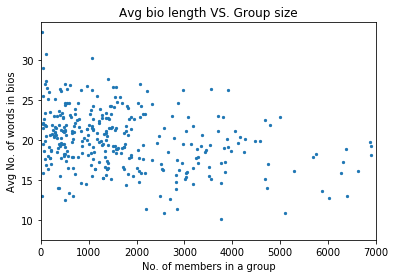

In [149]:
plt.scatter(x, y,s = 5)
plt.xlim([0, 7000])
plt.title("Avg bio length VS. Group size")
plt.xlabel("No. of members in a group")
plt.ylabel("Avg No. of words in bios")
plt
plt.show()

In [7]:
list(groups.results[1].keys())

['utc_offset',
 'country',
 'visibility',
 'city',
 'timezone',
 'created',
 'topics',
 'link',
 'rating',
 'description',
 'lon',
 'group_photo',
 'join_mode',
 'organizer',
 'members',
 'name',
 'id',
 'state',
 'urlname',
 'category',
 'lat',
 'who']

In [6]:
groups = client.GetGroups(category=[13], page = 200, offset = 1)

29/30 (10 seconds remaining)


In [7]:
groups

AttributeError: 'MeetupObject' object has no attribute 'results'

In [171]:
events.results[0]
events.results[0]['created']
pd.to_datetime(events.results[0]['created']/1000, unit='s').date()

datetime.date(2018, 10, 14)

In [179]:
columns = ['id', 'name', 'description', 'created_date', 'duration', 'yes_rsvp_count', 'group_id', 'group_name','group_URL']
# categories = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
categories = [33, 34]
member_df = pd.DataFrame(columns=columns)

In [182]:
for i in range(1, 10):
    events = client.GetOpenEvents(category = categories, page = 200, offset = i)
    if hasattr(events, 'results'):
        json_string = json.dumps(events.results)
        results = json.loads(json_string)
    
        for result in results:
            if 'description' in result and 'duration' in result:
                temp = [result["id"],
                        result["name"],
                        result["description"],
                        pd.to_datetime(result['created']/1000, unit='s').date(),
                        result["duration"] / 60000,
                        result["yes_rsvp_count"],
                        result["group"]["id"],
                        result["group"]["name"],
                        result["group"]["urlname"]]
                event_df = event_df.append(pd.Series(temp, index=columns), ignore_index = True)

29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (5 seconds remaining)
26/30 (3 seconds remaining)
25/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (7 seconds remaining)
27/30 (5 seconds remaining)
26/30 (1 seconds remaining)


In [183]:
unique_events = event_df.drop_duplicates(subset=['name', 'description', 'created_date'])
unique_events

,id,name,description,created_date,duration,yes_rsvp_count,group_id,group_name,group_URL
0,256553827,BitcoinPHL - Wallet Workshop and Happy Hour wi...,<p>Looks like it's about that time of month ag...,2018-11-19,180.0,10,10624752,BitcoinPHL,BitcoinPHL
1,rlvzspyxpbkc,NSCoder Night,<p>Very informal. Come commiserate over Pizza ...,2018-05-29,150.0,31,18371658,NSCoder Chicago,NSCoder-Chicago
2,256493201,BeerWeekly digital Stammtisch - Annapam,<p>Neue Runde: wie immer Plausch bei Bier und ...,2018-11-17,180.0,11,26314241,BeerWeekly digital Stammtisch,BeerWeekly-digital-Stammtisch
3,255964674,Elastic Brno meetup #1,<p>alko/nealko a kafe zajištěno :)</p> <p>Prog...,2018-10-30,180.0,40,8903632,Elastic User Group - CZ,CZ-Elastic-Fantastics
4,njwpkqyxpbkc,Code Co-op - A free coding help & hack night,<p>Interested in breaking out of a dead end ca...,2018-10-19,120.0,25,1661726,BASE (Birmingham Alabama Software Enthusiasts),base205
5,256238711,DC215 November meetup,<p>This is just a reminder for all of you. See...,2018-11-08,180.0,17,18465379,Security Shell,SecShell
6,255818271,Scrum Masters & Agile Coaches as Change Agents,<p>This meetup will focus on Scrum Masters as ...,2018-10-25,90.0,10,29562841,Scrum Mastery STL,Scrum-Mastery-STL
7,256008745,Container Runtime Security with Falco,<p>Host intrusion detection (HID) has been aro...,2018-10-31,120.0,22,23950451,Dallas Kubernetes Meetup,Dallas-Kubernetes-Meetup
8,256168318,VueNYC #16: Vaporwave Novuember,<p>🎉Talks 🎉</p> <p>💬NYC Riots: Protestors Dema...,2018-11-06,180.0,77,23275212,VueNYC,vueJsNYC
9,256173913,Breaking up the Monolith - what have we learnt?,<p>This month we'll be discussing our experien...,2018-11-06,120.0,30,27752318,Architecting Manchester,Manchester-Software-Architecture-Meetup


In [ ]:
categories = []
for index, row in unique_events.iterrows():
    group_info = client.GetGroup({'urlname': row['group_URL']})
    categories.append(group_info.category['name'])

29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (9 seconds remaining)
25/30 (9 seconds remaining)
24/30 (9 seconds remaining)
23/30 (9 seconds remaining)
22/30 (9 seconds remaining)
21/30 (8 seconds remaining)
20/30 (8 seconds remaining)
19/30 (8 seconds remaining)
18/30 (8 seconds remaining)
17/30 (7 seconds remaining)
16/30 (7 seconds remaining)
15/30 (7 seconds remaining)
14/30 (7 seconds remaining)
13/30 (6 seconds remaining)
12/30 (6 seconds remaining)
11/30 (6 seconds remaining)
10/30 (6 seconds remaining)
9/30 (6 seconds remaining)
8/30 (5 seconds remaining)
7/30 (5 seconds remaining)
6/30 (5 seconds remaining)
5/30 (5 seconds remaining)
Sleeping for 6 seconds
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (9 seconds remaining)
25/30 (9 seconds remaining)
24/30 (9 seconds remaining)
23/30 (9 seconds remaining)
22/30 (9 seconds remaining)
21/30 (8 seconds remaining)
20/30 (7 seconds remaini

11/30 (6 seconds remaining)
10/30 (5 seconds remaining)
9/30 (5 seconds remaining)
8/30 (5 seconds remaining)
7/30 (5 seconds remaining)
6/30 (5 seconds remaining)
5/30 (4 seconds remaining)
Sleeping for 5 seconds
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (10 seconds remaining)
26/30 (9 seconds remaining)
25/30 (9 seconds remaining)
24/30 (9 seconds remaining)
23/30 (9 seconds remaining)
22/30 (9 seconds remaining)
21/30 (8 seconds remaining)
20/30 (8 seconds remaining)
19/30 (8 seconds remaining)
18/30 (8 seconds remaining)
17/30 (8 seconds remaining)
16/30 (7 seconds remaining)
15/30 (7 seconds remaining)
14/30 (7 seconds remaining)
13/30 (7 seconds remaining)
12/30 (6 seconds remaining)
11/30 (6 seconds remaining)
10/30 (6 seconds remaining)
9/30 (6 seconds remaining)
8/30 (6 seconds remaining)
7/30 (5 seconds remaining)
6/30 (5 seconds remaining)
5/30 (5 seconds remaining)
Sleeping for 6 seconds
29/30 (10 seconds remaining)
28/30 (10 seconds remaining)
27/30 (

In [167]:
temp = pd.Series(categories)
unique_events['category'] = temp
unique_events

/Users/javis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,name,description,created_date,duration,yes_rsvp_count,group_id,group_name,group_URL,category
0,256068839,Jak w praktyce wspierać rozwój motywacji w Zes...,<p>Serdecznie zapraszamy na kolejne spotkanie ...,2018-11-02,210.0,19,23482814,Agile4U,agile4u,Tech
1,256296386,Why penetration testing sucks,<p>A call for security maturity!</p> <p>The fi...,2018-11-10,120.0,7,21596714,Critical Tech,Critical-Tech,Tech
2,256128343,OpenShift Meetup,<p>OpenShift Meetup</p> <p>17:30 - Welkom<br/>...,2018-11-04,210.0,44,20134566,HCS Company Meetups,HCS-Company-Meetups,Tech
3,tnsvgqyxpbkc,Dinner with some San Diego Digital Designers 🍕,"<p>Hello, digital designers! Once a month, we'...",2018-09-25,120.0,15,29426973,San Diego Digital Designers,_SDDD_,Tech
4,256296674,November Meetup,<p>Retha Langa will take us through an Introdu...,2018-11-10,120.0,20,27651490,R-Ladies Johannesburg,rladies-johannesburg,Tech
5,256279567,Increase Revenue and Boost Productivity with M...,<p>Meet Up - London Salesforce User Group: Tue...,2018-11-09,90.0,12,27165175,London Salesforce User Group,London-Salesforce-User-Group,Tech
6,256346028,Defining The Industrial IoT,"<p>Whether you are an IT or OT role, everyone ...",2018-11-12,120.0,59,1802328,Big Data Jax,jaxbigdata,Tech
7,255738080,Ledarskap som motiverar människor att vara sit...,<p>Den här kvällen har vi glädjen att samköra ...,2018-10-22,150.0,62,29886167,Agile People Göteborg,Agile-People-Goteborg,Tech
8,255387213,infoShare AI Roadshow - Poznań,<p>infoShare rusza w trasę! 🚌</p> <p>6 miast -...,2018-10-09,240.0,32,21073634,infoShare,infoShare-Bus,Tech
9,256220909,Year end and holiday celebration dinner 2018 -...,<p>It's time to celebrate another year. Who ca...,2018-11-08,120.0,14,19682989,PGH Women's Wired Network,PGH-Womens-Wired-Network,Tech


In [168]:
unique_events['category'].value_counts()

Tech                       1624
Career & Business             9
Education & Learning          2
Sci-Fi & Fantasy              1
LGBT                          1
Arts & Culture                1
Community & Environment       1
Writing                       1
Socializing                   1
Name: category, dtype: int64

In [84]:
events.__dict__.keys()

dict_keys(['details', 'code', 'problem'])

In [85]:
events.details

"Perhaps you're missing a required parameter. You can find full documentation of the api here: https://www.meetup.com/meetup_api/docs/"

In [111]:
category_list = client.GetCategories(page = 200, offset = 1)

29/30 (10 seconds remaining)


In [116]:
category_list.results

[{'name': 'Arts & Culture',
  'sort_name': 'Arts & Culture',
  'id': 1,
  'shortname': 'Arts'},
 {'name': 'Book Clubs',
  'sort_name': 'Book Clubs',
  'id': 18,
  'shortname': 'Book Clubs'},
 {'name': 'Career & Business',
  'sort_name': 'Career & Business',
  'id': 2,
  'shortname': 'Business'},
 {'name': 'Cars & Motorcycles',
  'sort_name': 'Cars & Motorcycles',
  'id': 3,
  'shortname': 'Auto'},
 {'name': 'Community & Environment',
  'sort_name': 'Community & Environment',
  'id': 4,
  'shortname': 'Community'},
 {'name': 'Dancing', 'sort_name': 'Dancing', 'id': 5, 'shortname': 'Dancing'},
 {'name': 'Education & Learning',
  'sort_name': 'Education & Learning',
  'id': 6,
  'shortname': 'Education'},
 {'name': 'Fashion & Beauty',
  'sort_name': 'Fashion & Beauty',
  'id': 8,
  'shortname': 'Fashion'},
 {'name': 'Fitness', 'sort_name': 'Fitness', 'id': 9, 'shortname': 'Fitness'},
 {'name': 'Food & Drink',
  'sort_name': 'Food & Drink',
  'id': 10,
  'shortname': 'Food & Drink'},
 {'na